In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/improve-breast-cancer-prognostics-using-machine/unformatted-data.csv
/kaggle/input/improve-breast-cancer-prognostics-using-machine/wdbc.data.csv
/kaggle/input/improve-breast-cancer-prognostics-using-machine/wpbc.data.csv
/kaggle/input/improve-breast-cancer-prognostics-using-machine/breast-cancer-wisconsin.data.csv
/kaggle/input/wiscinsonprognosisdataset/wpbc.data.csv


## Highest accuracy achieved is 87.8% by LightGBM algorithm after removing the highly correlated columns


## Normal execution without feature selection,feature selection using correlation coefficient and feature transformation using PCA has been done

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/wiscinsonprognosisdataset/wpbc.data.csv")

In [4]:
df

,id,Recurrence,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.1
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [5]:
df['Lymph node status'].unique()

array(['5.1', '2', '0', '?', '10', '1', '20', '6', '13', '4', '17', '15',
       '11', '9', '8', '7', '3', '14', '27', '5', '24', '18', '16', '21'],
      dtype=object)

In [6]:
df['Lymph node status']=df['Lymph node status'].apply(lambda x: np.nan if x == '?' else x) 

In [7]:
df['Lymph node status']=df['Lymph node status'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   Recurrence               198 non-null    object 
 2   Time                     198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

In [9]:
df['Lymph node status']=df['Lymph node status'].fillna(df['Lymph node status'].mean())

In [10]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Recurrence']= label_encoder.fit_transform(df['Recurrence'])

df['Recurrence'].unique()
df['Recurrence']=df['Recurrence'].astype(int)
df.head()

,id,Recurrence,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.1
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [11]:
X=df.iloc[:,2:34]

In [12]:
X

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0
194,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7
196,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0


In [13]:
y=df['Recurrence']

## Without any feature selection


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

81.81818181818183


In [16]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=1000000,dual=False)
logModel.fit(X_train, y_train,)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

81.81818181818183

In [17]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

LightGBM Model accuracy score: 77.2727


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)
 

In [19]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


87.87878787878788


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)

84.84848484848484


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.score(X_test, y_test)*100)

78.78787878787878


In [22]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear') 
  
#fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred2=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy*100)

83.33333333333334


## With feature selection using Correlation coefficient

In [23]:
# Build a Dataframe with Correlation between Features
corr_matrix = X.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.8]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()


,feature1,feature2,Correlation
0,radius_mean,perimeter_mean,0.995933
1,perimeter_mean,radius_mean,0.995933
2,radius_mean,area_mean,0.992855
3,area_mean,radius_mean,0.992855
4,perimeter_mean,area_mean,0.990699


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Get groups of features that are correlated amongs themselves
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))

Found 9 correlated feature groups
out of 32 total features.


In [26]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

       feature1         feature2  Correlation
0   radius_mean   perimeter_mean     0.995933
2   radius_mean        area_mean     0.992855
22  radius_mean     radius_worst     0.924183
28  radius_mean  perimeter_worst     0.915053
34  radius_mean       area_worst     0.891489


        feature1   feature2  Correlation
12  perimeter_se  radius_se     0.973267
18  perimeter_se    area_se     0.929603


               feature1        feature2  Correlation
32  concave points_mean  concavity_mean      0.90999


        feature1       feature2  Correlation
38  texture_mean  texture_worst      0.86205


             feature1                 feature2  Correlation
40  compactness_worst  fractal_dimension_worst     0.847403
49  compactness_worst          concavity_worst     0.835064


                feature1        feature2  Correlation
42  fractal_dimension_se  compactness_se     0.845176


                  feature1                 feature2  Correlation
44  fractal_dimension_mean  fractal_dime

In [27]:
df.drop("perimeter_mean",axis=1,inplace=True)
df.drop("area_mean",axis=1,inplace=True)
df.drop("radius_worst",axis=1,inplace=True)
df.drop("perimeter_worst",axis=1,inplace=True)
df.drop("area_worst",axis=1,inplace=True)

In [28]:
df.drop("radius_se",axis=1,inplace=True)
df.drop("area_se",axis=1,inplace=True)

In [29]:
df.drop("concavity_mean",axis=1,inplace=True)
df.drop("texture_worst",axis=1,inplace=True)
df.drop("fractal_dimension_worst",axis=1,inplace=True)
df.drop("concavity_worst",axis=1,inplace=True)


In [30]:
df.drop("compactness_se",axis=1,inplace=True)


In [31]:
df

,id,Recurrence,Time,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concave points_worst,symmetry_worst,Tumor Size,Lymph node status
0,119513,0,31,18.02,27.60,0.09489,0.10360,0.07055,0.1865,0.06333,...,0.03233,0.009854,0.01694,0.003495,0.11950,0.1926,0.11700,0.2677,5.0,5.100000
1,8423,0,61,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,...,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.26540,0.4601,3.0,2.000000
2,842517,0,116,21.37,17.44,0.08836,0.11890,0.08180,0.2333,0.06010,...,0.03300,0.018050,0.03094,0.005039,0.11880,0.3449,0.20320,0.4334,2.5,0.000000
3,843483,0,123,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,...,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.25750,0.6638,2.0,0.000000
4,843584,1,27,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,...,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.16250,0.2364,3.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,0.07592,0.09162,0.06367,0.1728,0.05262,...,0.02433,0.020360,0.02486,0.003922,0.08191,0.1319,0.09378,0.2061,6.0,2.000000
194,943471,0,8,15.44,31.18,0.09399,0.10620,0.06500,0.1735,0.06105,...,0.02834,0.010790,0.02122,0.003168,0.12720,0.2362,0.12860,0.2914,1.5,0.000000
195,94547,0,12,17.17,29.19,0.08952,0.06655,0.05068,0.1793,0.05392,...,0.03155,0.009714,0.02734,0.001377,0.12610,0.1572,0.09520,0.3362,3.7,0.000000
196,947204,1,3,21.42,22.84,0.10700,0.19390,0.13180,0.1884,0.06472,...,0.04948,0.017700,0.01481,0.003979,0.14980,0.4379,0.22150,0.2832,3.0,3.211856


In [32]:
## Normalising skewed rows

In [33]:
df.skew(axis = 0)

id                        1.990248
Recurrence                1.243958
Time                      0.514322
radius_mean               0.313726
texture_mean              0.571373
smoothness_mean           0.443359
compactness_mean          0.614172
concave points_mean       0.697699
symmetry_mean             0.775116
fractal_dimension_mean    0.999702
texture_se                1.309493
perimeter_se              1.262808
smoothness_se             3.905352
concavity_se              1.749850
concave points_se         1.280522
symmetry_se               2.130190
fractal_dimension_se      1.683379
smoothness_worst          0.460028
compactness_worst         1.165402
concave points_worst     -0.147846
symmetry_worst            1.120878
Tumor Size                1.752621
Lymph node status         2.278842
dtype: float64

In [34]:
df['smoothness_se']=np.log(df['smoothness_se'])

In [35]:
df.skew(axis=0)

id                        1.990248
Recurrence                1.243958
Time                      0.514322
radius_mean               0.313726
texture_mean              0.571373
smoothness_mean           0.443359
compactness_mean          0.614172
concave points_mean       0.697699
symmetry_mean             0.775116
fractal_dimension_mean    0.999702
texture_se                1.309493
perimeter_se              1.262808
smoothness_se             0.658615
concavity_se              1.749850
concave points_se         1.280522
symmetry_se               2.130190
fractal_dimension_se      1.683379
smoothness_worst          0.460028
compactness_worst         1.165402
concave points_worst     -0.147846
symmetry_worst            1.120878
Tumor Size                1.752621
Lymph node status         2.278842
dtype: float64

## Applying ML models on the new feature reduced data

In [36]:
X=df.iloc[:,2:23]

In [37]:
X

,Time,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concave points_worst,symmetry_worst,Tumor Size,Lymph node status
0,31,18.02,27.60,0.09489,0.10360,0.07055,0.1865,0.06333,1.8900,3.972,...,0.03233,0.009854,0.01694,0.003495,0.11950,0.1926,0.11700,0.2677,5.0,5.100000
1,61,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,8.589,...,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.26540,0.4601,3.0,2.000000
2,116,21.37,17.44,0.08836,0.11890,0.08180,0.2333,0.06010,0.6105,3.928,...,0.03300,0.018050,0.03094,0.005039,0.11880,0.3449,0.20320,0.4334,2.5,0.000000
3,123,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,3.445,...,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.25750,0.6638,2.0,0.000000
4,27,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,5.438,...,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.16250,0.2364,3.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,0.07592,0.09162,0.06367,0.1728,0.05262,2.3120,9.938,...,0.02433,0.020360,0.02486,0.003922,0.08191,0.1319,0.09378,0.2061,6.0,2.000000
194,8,15.44,31.18,0.09399,0.10620,0.06500,0.1735,0.06105,1.8390,1.971,...,0.02834,0.010790,0.02122,0.003168,0.12720,0.2362,0.12860,0.2914,1.5,0.000000
195,12,17.17,29.19,0.08952,0.06655,0.05068,0.1793,0.05392,1.4250,3.827,...,0.03155,0.009714,0.02734,0.001377,0.12610,0.1572,0.09520,0.3362,3.7,0.000000
196,3,21.42,22.84,0.10700,0.19390,0.13180,0.1884,0.06472,0.8469,8.308,...,0.04948,0.017700,0.01481,0.003979,0.14980,0.4379,0.22150,0.2832,3.0,3.211856


In [38]:
y=df['Recurrence']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

83.33333333333334


In [41]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=1000000,dual=False)
logModel.fit(X_train, y_train,)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

80.3030303030303

In [42]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

LightGBM Model accuracy score: 87.8788


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)
 

In [44]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


84.84848484848484


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)

81.81818181818183


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.score(X_test, y_test)*100)

75.75757575757575


In [47]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear') 
  
#fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred2=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy*100)

78.78787878787878


## Using PCA

In [48]:
from sklearn.decomposition import PCA
pca_n=PCA(n_components=10,random_state=2020)

In [49]:
pca_n.fit(X)

PCA(n_components=10, random_state=2020)

In [50]:
X_pca_n=pca_n.transform(X)

In [51]:
sum(pca_n.explained_variance_ratio_*100)

99.9998218148083

In [52]:
np.cumsum(pca_n.explained_variance_ratio_*100)

array([94.93410889, 97.31637047, 98.69228049, 99.55235438, 99.77357819,
       99.97462217, 99.99078529, 99.99719936, 99.99957426, 99.99982181])

Text(0, 0.5, 'Explained variance')

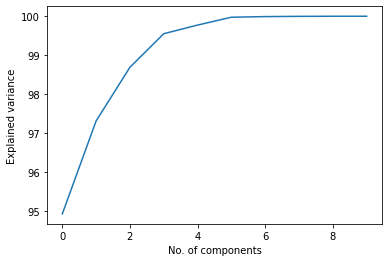

In [53]:
plt.plot(np.cumsum(pca_n.explained_variance_ratio_*100))
plt.xlabel('No. of components')
plt.ylabel('Explained variance')

In [54]:
pca_98=PCA(n_components=0.99,random_state=2020)

In [55]:
pca_98.fit(X)
X_pca_98=pca_98.transform(X)

In [56]:
X_new=pd.DataFrame(X_pca_98,columns=['PC1','PC2','PC3','PC4'])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [59]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

LightGBM Model accuracy score: 83.3333


In [60]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)

81.81818181818183


In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)

In [62]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


78.78787878787878


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.score(X_test, y_test)*100)

83.33333333333334


In [64]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=1000000,dual=False)
logModel.fit(X_train, y_train,)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

84.84848484848484

In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

83.33333333333334


In [66]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
#fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred2=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy*100)

80.3030303030303
